# Обаботка набора данных Product Demand Forecast

**Задачи**: Проверить и обработать набора данных, подготовить его для дальнейшей работы с ним

## Загрузка и описание данных

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Загрузка данных
holidays_events = pd.read_csv('input_data/holidays_events.csv')
oil = pd.read_csv('input_data/oil.csv')
sample_submission = pd.read_csv('input_data/sample_submission.csv')
stores = pd.read_csv('input_data/stores.csv')
test = pd.read_csv('input_data/test.csv')
train = pd.read_csv('input_data/train.csv')
transactions = pd.read_csv('input_data/transactions.csv')

dfs = {
    'holidays_events': holidays_events,
    'oil': oil,
    # 'sample_submission': sample_submission,
    'stores': stores,
    # 'test': test,
    'train': train,
    'transactions': transactions
}

**Описание набора данных:**

Этот набор данных предназначен для прогнозирования спроса на продукцию в сети магазинов. Он включает несколько файлов, каждый из которых предоставляет различные аспекты информации, необходимой для построения модели прогнозирования. Данные охватывают несколько лет и содержат информацию о продажах, акциях, праздниках, ценах на нефть и транзакциях в магазинах.

1. **`holidays_events.csv`** (350 строк, 6 столбцов):
   Этот файл содержит информацию о праздниках и событиях, которые могут влиять на спрос на продукцию. Праздники могут оказывать значительное влияние на объем продаж, поэтому учет этих данных важен для построения точных прогнозов.

**Обзор данных:**

| **date**   | **type**  | **locale** | **locale_name** | **description**                   | **transferred** |
|------------|-----------|------------|-----------------|-----------------------------------|-----------------|
| 2012-03-02 | Holiday   | Local      | Manta           | Fundacion de Manta                | False           |
| 2012-04-01 | Holiday   | Regional   | Cotopaxi        | Provincializacion de Cotopaxi     | False           |
| 2012-04-12 | Holiday   | Local      | Cuenca          | Fundacion de Cuenca               | False           |
| 2012-04-14 | Holiday   | Local      | Libertad        | Cantonizacion de Libertad         | False           |
| 2012-04-21 | Holiday   | Local      | Riobamba        | Cantonizacion de Riobamba         | False           |

   - **date**: Дата праздника или события.
   - **type**: Тип события (например, праздник).
   - **locale**: Местоположение события (Local - местный, Regional - региональный).
   - **locale_name**: Название местоположения.
   - **description**: Описание события.
   - **transferred**: Флаг, указывающий, было ли событие перенесено (True/False).

2. **`oil.csv`** (1218 строк, 2 столбца):
   Этот файл содержит данные о ценах на нефть (WTI), которые могут оказывать влияние на экономическую ситуацию и, как следствие, на спрос на продукцию. Изменения в ценах на нефть могут повлиять на стоимость логистики и, таким образом, на цены и спрос.

**Обзор данных:**

| **date**   | **dcoilwtico** |
|------------|----------------|
| 2013-01-01 | NaN            |
| 2013-01-02 | 93.14          |
| 2013-01-03 | 92.97          |
| 2013-01-04 | 93.12          |
| 2013-01-07 | 93.20          |


   - **date**: Дата.
   - **dcoilwtico**: Цена нефти (в долларовом эквиваленте WTI - West Texas Intermediate) на указанную дату.

3. **`sample_submission.csv`** (28512 строк, 2 столбца):
   Этот файл предназначен для примера формата подачи результатов модели в соревнования или тесты. Он содержит идентификаторы и предполагаемые продажи, которые нужно спрогнозировать.

 **Обзор данных:**

| **id**    | **sales** |
|-----------|-----------|
| 3000888   | 0.0       |
| 3000889   | 0.0       |
| 3000890   | 0.0       |
| 3000891   | 0.0       |
| 3000892   | 0.0       |

   - **id**: Уникальный идентификатор строки.
   - **sales**: Продажи (для примера заполнения формата файла для подачи на соревнование или тест).

4. **`stores.csv`** (54 строки, 5 столбцов):
   Этот файл содержит информацию о магазинах, включая их местоположение, тип и кластеризацию. Эти данные помогают понять, как различия между магазинами могут влиять на спрос.

**Обзор данных:**

| **store_nbr** | **city**       | **state**                          | **type** | **cluster** |
|---------------|----------------|------------------------------------|----------|-------------|
| 1             | Quito          | Pichincha                           | D        | 13          |
| 2             | Quito          | Pichincha                           | D        | 13          |
| 3             | Quito          | Pichincha                           | D        | 8           |
| 4             | Quito          | Pichincha                           | D        | 9           |
| 5             | Santo Domingo  | Santo Domingo de los Tsachilas      | D        | 4           |

   - **store_nbr**: Номер магазина.
   - **city**: Город, в котором расположен магазин.
   - **state**: Штат или регион.
   - **type**: Тип магазина (например, D - дисконтный).
   - **cluster**: Кластер магазина для группировки по характеристикам.


5. **`test.csv`** (28512 строк, 5 столбцов):
   Этот файл используется для тестирования модели. Он содержит данные о магазинах, категориях продукции и акциях, но не включает информацию о продажах. На основе этих данных модель должна спрогнозировать объем продаж.

**Обзор данных:**

| **id**    | **date**   | **store_nbr** | **family**  | **onpromotion** |
|-----------|------------|---------------|-------------|-----------------|
| 3000888   | 2017-08-16 | 1             | AUTOMOTIVE   | 0               |
| 3000889   | 2017-08-16 | 1             | BABY CARE    | 0               |
| 3000890   | 2017-08-16 | 1             | BEAUTY       | 2               |
| 3000891   | 2017-08-16 | 1             | BEVERAGES    | 20              |
| 3000892   | 2017-08-16 | 1             | BOOKS        | 0               |

   - **id**: Уникальный идентификатор строки.
   - **date**: Дата.
   - **store_nbr**: Номер магазина.
   - **family**: Категория продукции.
   - **onpromotion**: Количество единиц на акции (скидки, предложения и т.д.).

6. **`train.csv`** (3000888 строк, 6 столбцов):
   Этот файл содержит тренировочные данные, включающие информацию о продажах, акциях и категориях продукции. Эти данные используются для обучения модели и включают информацию о времени, местоположении и акциях.

**Обзор данных:**

| **id** | **date**   | **store_nbr** | **family**  | **sales** | **onpromotion** |
|--------|------------|---------------|-------------|-----------|-----------------|
| 0      | 2013-01-01 | 1             | AUTOMOTIVE   | 0.0       | 0               |
| 1      | 2013-01-01 | 1             | BABY CARE    | 0.0       | 0               |
| 2      | 2013-01-01 | 1             | BEAUTY       | 0.0       | 0               |
| 3      | 2013-01-01 | 1             | BEVERAGES    | 0.0       | 0               |
| 4      | 2013-01-01 | 1             | BOOKS        | 0.0       | 0               |

   - **id**: Уникальный идентификатор строки.
   - **date**: Дата.
   - **store_nbr**: Номер магазина.
   - **family**: Категория продукции.
   - **sales**: Продажи на эту дату.
   - **onpromotion**: Количество единиц на акции (скидки, предложения и т.д.).

7. **`transactions.csv`** (83488 строк, 3 столбца):
   Этот файл содержит данные о количестве транзакций в магазинах. Эти данные помогают понять, как часто происходят продажи и как это связано с другими переменными, такими как акции и праздники.

**Обзор данных:**

| **date**   | **store_nbr** | **transactions** |
|------------|---------------|------------------|
| 2013-01-01 | 25            | 770              |
| 2013-01-02 | 1             | 2111             |
| 2013-01-02 | 2             | 2358             |
| 2013-01-02 | 3             | 3487             |
| 2013-01-02 | 4             | 1922             |

   - **date**: Дата.
   - **store_nbr**: Номер магазина.
   - **transactions**: Количество транзакций (продаж) в магазине на указанную дату.

## Обработка данных

Обработка данных — это ключевой этап в любом проекте машинного обучения и анализа данных. Она включает в себя несколько важных шагов, каждый из которых необходим для обеспечения качества и корректности данных, а также для их подготовки к дальнейшему анализу и моделированию. Вот основные причины, почему обработка данных важна:


1. **Проверка типов данных:**
   - **Правильность типов данных:** Корректное определение типов данных (например, даты, числовые значения, категории) позволяет избежать ошибок при анализе и моделировании. Неправильные типы данных могут привести к некорректным результатам.
   - **Оптимизация использования памяти:** Правильное назначение типов данных помогает эффективно использовать память и улучшает производительность.

2. **Проверка на пропущенные значения и дубликаты:**
   - **Целостность данных:** Пропущенные значения и дубликаты могут искажать результаты анализа и влиять на качество модели. Устранение этих проблем помогает обеспечить целостность и точность данных.
   - **Корректность вычислений:** Пропущенные данные могут привести к ошибкам в расчетах и статистике, а дубликаты могут исказить результаты анализа.

3. **Проверка на аномалии:**
   - **Выявление ошибок:** Аномалии, такие как нереалистичные или некорректные значения, могут указывать на ошибки в данных или неправильный ввод. Их выявление помогает предотвратить использование некорректных данных в анализе.
   - **Обеспечение реалистичности:** Убедиться, что данные находятся в допустимом диапазоне значений и соответствуют ожиданиям, помогает избежать использования нереалистичных данных, которые могут негативно повлиять на результаты.

### Проверка типов данных
Перед работой с данными необходимо проверить правильность типов данных

In [3]:
def check_and_fix_dtypes(df: pd.DataFrame):
    
    print(f"Типы до бработки \n{df.dtypes}")
    df = df.infer_objects()
    
    try:
        df['date'] = pd.to_datetime(df['date'])
    except:
        pass

    print(f"Типы после обработки \n{df.dtypes}")

    return df

for name, df in dfs.items():
    print(f"Проверка набора данных: {name}")
    dfs[name] = check_and_fix_dtypes(df)
    print()

holidays_events = dfs['holidays_events']
oil = dfs['oil']
stores = dfs['stores']
train = dfs['train']
transactions = dfs['transactions']

Проверка набора данных: holidays_events
Типы до бработки 
date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object
Типы после обработки 
date           datetime64[ns]
type                   object
locale                 object
locale_name            object
description            object
transferred              bool
dtype: object

Проверка набора данных: oil
Типы до бработки 
date           object
dcoilwtico    float64
dtype: object
Типы после обработки 
date          datetime64[ns]
dcoilwtico           float64
dtype: object

Проверка набора данных: stores
Типы до бработки 
store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object
Типы после обработки 
store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object

Проверка набора данных: train
Типы до бработки 
id               int64
date     

### Проверка на пустые значений и дубликаты
Данные необходимо проверить на пустые значений и дубликаты, так как они будут мешать дальнейшему нализу

In [4]:
def check_missing_and_duplicates(df: pd.DataFrame):
    # Проверка на пустые значения
    missing_values = df.isnull().sum()
    total_missing = missing_values.sum()
    
    # Проверка на дубликаты
    duplicate_rows = df.duplicated().sum()

    # Результат
    if total_missing.sum() == duplicate_rows.sum() == 0:
        print("Дубликатов и пустых значений не обнаружено")

    else:
        if total_missing > 0:
            print("Пустые значения по столбцам:")
            print(missing_values[missing_values > 0])
        
        if duplicate_rows > 0:
            print(f"Дубликаты обнаружены в следующих строках: {df[df.duplicated()]}")

# Проход по каждому набору данных
for name, df in dfs.items():
    print(f"Проверка набора данных: {name}")
    check_missing_and_duplicates(df)
    print()

Проверка набора данных: holidays_events
Дубликатов и пустых значений не обнаружено

Проверка набора данных: oil
Пустые значения по столбцам:
dcoilwtico    43
dtype: int64

Проверка набора данных: stores
Дубликатов и пустых значений не обнаружено

Проверка набора данных: train
Дубликатов и пустых значений не обнаружено

Проверка набора данных: transactions
Дубликатов и пустых значений не обнаружено



Обнаружены пустые значения в датасете oil, так как их меньше 20% от всего набора данных, то их можно просто удалить

In [5]:
oil = oil.dropna()

print(f"Пустых значений после обрабтки: {oil.isna().sum().sum()}")

Пустых значений после обрабтки: 0


### Проверка на аномалии
Проверка данных на аномалии и выбросы важна для повышения точности анализа и моделей, поскольку они могут исказить результаты и затруднить интерпретацию.

#### Проверка датасета `holidays_events`

In [6]:
holidays_events[[column for column in holidays_events.columns if holidays_events[column].dtypes == 'object']].describe()

,type,locale,locale_name,description
count,350,350,350,350
unique,6,3,24,103
top,Holiday,National,Ecuador,Carnaval
freq,221,174,174,10


In [7]:
holidays_events.describe()

,date
count,350
mean,2015-04-24 00:45:15.428571392
min,2012-03-02 00:00:00
25%,2013-12-23 06:00:00
50%,2015-06-08 00:00:00
75%,2016-07-03 00:00:00
max,2017-12-26 00:00:00


In [8]:
pd.DataFrame(holidays_events['transferred'].describe())

,transferred
count,350
unique,2
top,False
freq,338


На основе предоставленных данных можно сделать следующие выводы:

##### Анализ категориальных данных (`type`, `locale`, `locale_name`, `description`)

1. **Количество уникальных значений**:
   - **`type`**: 6 уникальных значений
   - **`locale`**: 3 уникальных значения
   - **`locale_name`**: 24 уникальных значения
   - **`description`**: 103 уникальных значений

2. **Частотный анализ**:
   - **`type`**: Самое частое значение — `Holiday`, встречается 221 раз.
   - **`locale`**: Самое частое значение — `National`, встречается 174 раза.
   - **`locale_name`**: Самое частое значение — `Ecuador`, встречается 174 раза.
   - **`description`**: Самое частое значение — `Carnaval`, встречается 10 раз.

Эти статистики указывают на то, что большинство данных сосредоточено вокруг нескольких значений в каждой категории. Однако, это не обязательно указывает на аномалии или выбросы, так как данные могут быть сосредоточены вокруг нескольких типичных категорий.

##### Анализ временных данных (`date`)

- **Среднее значение**: 2015-04-24 00:45:15
- **Минимум**: 2012-03-02 00:00:00
- **Максимум**: 2017-12-26 00:00:00

Данные о датах охватывают период с марта 2012 года по декабрь 2017 года, что является довольно широким диапазоном и позволяет предположить, что данные охватывают несколько лет.

##### Анализ данных по столбцу `transferred`

- **Количество уникальных значений**: 2 (True, False)
- **Частое значение**: `False`, встречается 338 раз

Преобладание значения `False` может указывать на то, что большинство событий не были перенесены.

На основе представленных данных:

- **Категориальные данные** не показывают явных аномалий или выбросов. Большинство значений сосредоточено вокруг небольшого набора категорий, что может быть нормальным для данного контекста.
- **Временные данные** охватывают широкий диапазон дат, но сами по себе не показывают аномалий.
- **Данные по столбцу `transferred`** показывают, что большинство записей имеют значение `False`, что также не указывает на аномалии.

Так как информация о праздниках и мероприятиях будет использоваться для прогнозирования продаж, нужно убедиться, что в датасете есть информация о мероприятиях за тестовый период; если их нет, необходимо сгенерировать прогнозируемые данные на основе имеющейся информации о праздниках и мероприятиях, заполнив пропуски с учетом сезонных и праздничных паттернов, типичных для данного региона.

In [9]:
print(f"Период с информацие о мероприятиях: {pd.to_datetime(holidays_events['date']).min()} - {pd.to_datetime(holidays_events['date']).max()}")
print(f"Тестовый период:                    {pd.to_datetime(test['date']).min()} - {pd.to_datetime(test['date']).max()}")

Период с информацие о мероприятиях: 2012-03-02 00:00:00 - 2017-12-26 00:00:00
Тестовый период:                    2017-08-16 00:00:00 - 2017-08-31 00:00:00


Информация и мероприятиях за тестовый период имеется

##### Определение не нужных атрибутов

Еесть атрибут `description`(описание события), так как он просто содержит описание, этот атрибут не понадобится для анализа, поэтому его можно удалить

In [10]:
holidays_events = holidays_events.drop('description',axis=1)

#### Проверка датасета `oil`

In [11]:
oil.describe()

,date,dcoilwtico
count,1175,1175.000000
mean,2015-05-02 18:15:37.531915008,67.714366
min,2013-01-02 00:00:00,26.190000
25%,2014-03-04 12:00:00,46.405000
50%,2015-05-04 00:00:00,53.190000
75%,2016-06-30 12:00:00,95.660000
max,2017-08-31 00:00:00,110.620000
std,NaN,25.630476


От сюда видно что информавцуия и цене за нефть на тестовый период имеется (`2017-08-16 - 2017-08-31`)

Так как `dcoilwtico` имеет вещественный тип и означает цены на нефть, его нужно отдельно проверить на вбросы и аномальные значения, используем квантиль, чтобы найти самые необычные значения. Например, 99-й квантиль, который показывает, что 99% всех значений меньше его. Значит, если какое-то значение больше этого порога, оно встречается очень редко — это и есть вбросы или аномалии.

In [12]:
oil[oil['dcoilwtico'] > oil['dcoilwtico'].quantile(0.99)]

,date,dcoilwtico
143,2013-07-19,108.00
170,2013-08-27,109.11
171,2013-08-28,110.17
172,2013-08-29,108.51
173,2013-08-30,107.98
175,2013-09-03,108.67
177,2013-09-05,108.50
178,2013-09-06,110.62
179,2013-09-09,109.62
182,2013-09-12,108.72


Данные не выглядят как аномалии, выполним графический анализт для более точной оценки

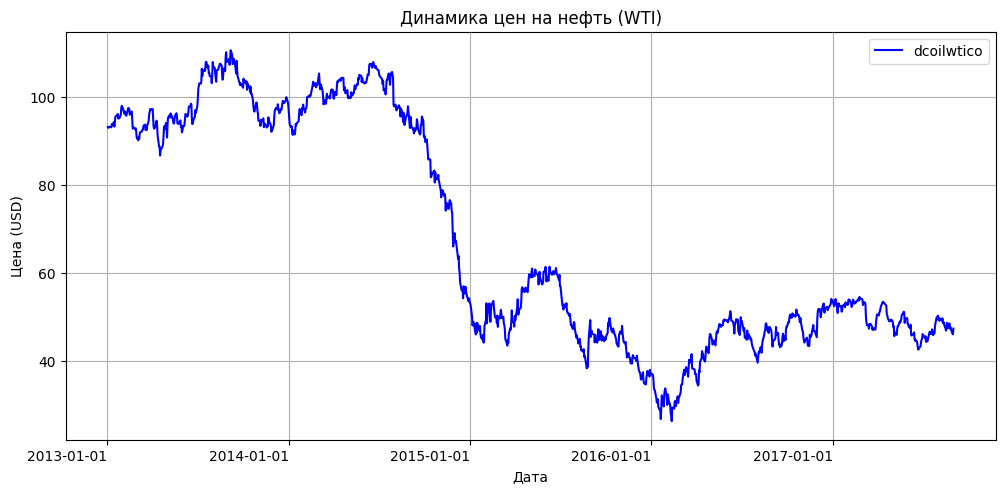

In [13]:
import matplotlib.dates as mdates

ax = oil.plot(x='date', y='dcoilwtico', kind='line', figsize=(12, 6), title='Динамика цен на нефть (WTI)', 
              xlabel='Дата', ylabel='Цена (USD)', grid=True, linestyle='-', color='blue')

# Форматирование оси X для отображения дат
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=0)  # Установка меток оси X горизонтальными
plt.show()

На основе предоставленных данных можно сделать следующие выводы:

##### Анализ данных (`date`, `dcoilwtico`)

1. **Статистики по `dcoilwtico`**:
   - **Среднее значение**: 67.71
   - **Минимум**: 26.19
   - **Максимум**: 110.62
   - **Стандартное отклонение**: 25.63

   Эти статистики показывают диапазон значений от 26.19 до 110.62, что является нормальным для цен на нефть, если учитывать исторические колебания цен.

2. **Выбросы**:
   - Выявлены данные, где значения `dcoilwtico` превышают 99-й перцентиль, что указывает на возможные выбросы:
   
      | date       | dcoilwtico |
      |------------|------------|
      | 2013-07-19 | 108.00     |
      | 2013-08-27 | 109.11     |
      | 2013-08-28 | 110.17     |
      | 2013-08-29 | 108.51     |
      | 2013-08-30 | 107.98     |
      | 2013-09-03 | 108.67     |
      | 2013-09-05 | 108.50     |
      | 2013-09-06 | 110.62     |
      | 2013-09-09 | 109.62     |
      | 2013-09-12 | 108.72     |
      | 2013-09-13 | 108.31     |
      | 2013-09-18 | 108.23     |


   Данные показывают высокие значения `dcoilwtico`, но это может быть связано с тем, что в исследуемом периоде были действительно высокие цены на нефть. Визуальный график не показывает аномальных отклонений, что может указывать на то, что эти высокие значения не являются выбросами в контексте временного ряда, а представляют собой периоды с высокими ценами.

По предоставленным данным можно сказать, что, хотя существуют высокие значения цен на нефть, они попадают в диапазон, характерный для исследуемого временного периода. Не наблюдается явных аномалий или выбросов, которые сильно отклоняются от ожидаемых трендов. Визуальный график подтверждает, что эти значения могут быть частью нормальных колебаний цен.

#### Проверка датасета `stores`

In [14]:
stores[[column for column in stores.columns if stores[column].dtypes == 'object']].describe()

,city,state,type
count,54,54,54
unique,22,16,5
top,Quito,Pichincha,D
freq,18,19,18


In [15]:
stores.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


На основе предоставленных данных можно сделать следующие выводы:

##### Анализ категориальных данных (city, state, type)

1. **Количество уникальных значений**:
   - `city`: 22 уникальных значения
   - `state`: 16 уникальных значений
   - `type`: 5 уникальных значений

2. **Частотный анализ**:
   - Самое частое значение для `city` — `Quito`, встречается 18 раз.
   - Самое частое значение для `state` — `Pichincha`, встречается 19 раз.
   - Самое частое значение для `type` — `D`, встречается 18 раз.

Эти статистики указывают на то, что большинство данных сосредоточено вокруг небольшого набора значений, что может свидетельствовать о высокой концентрации данных в определенных категориях, но это не обязательно указывает на аномалии или выбросы.

##### Анализ числовых данных (`store_nbr`, `cluster`)

- **`store_nbr`**: Значения равномерно распределены от 1 до 54. Все значения находятся в пределах ожидаемого диапазона, и размах не указывает на явные выбросы. Среднее значение и медиана совпадают, что говорит о симметричном распределении без резких отклонений.
  
- **`cluster`**: Значения варьируются от 1 до 17, что соответствует диапазону, заданному для кластеров. Среднее значение и медиана также близки друг к другу, что указывает на отсутствие выбросов.

По предоставленным данным можно сказать, что нет явных аномалий или выбросов. Все числовые значения находятся в ожидаемом диапазоне, а распределение категориальных данных также не показывает признаки аномального поведения. Выбросы могут проявляться в виде значений, сильно отклоняющихся от основной массы данных, но в данном случае таких значений не наблюдается.

#### Проверка датасета `train`

In [16]:
train[[column for column in train.columns if train[column].dtypes == 'object']].describe()

,family
count,3000888
unique,33
top,AUTOMOTIVE
freq,90936


In [17]:
train.describe()

,id,date,store_nbr,sales,onpromotion
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703088384,2.750000e+01,3.577757e+02,2.602770e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01


In [18]:
train[train['sales'] > train['sales'].quantile(0.99)]

,id,date,store_nbr,family,sales,onpromotion
1860,1860,2013-01-02,11,GROCERY I,7736.000,0
2520,2520,2013-01-02,3,GROCERY I,8463.000,0
3048,3048,2013-01-02,44,GROCERY I,10686.000,0
3081,3081,2013-01-02,45,GROCERY I,11422.000,0
3114,3114,2013-01-02,46,GROCERY I,10892.000,0
...,...,...,...,...,...,...
3000528,3000528,2017-08-15,49,BEVERAGES,5820.000,14
3000537,3000537,2017-08-15,49,GROCERY I,7001.000,38
3000555,3000555,2017-08-15,49,PRODUCE,6316.367,10
3000603,3000603,2017-08-15,50,GROCERY I,5647.000,35


In [19]:
train[train['onpromotion'] > train['onpromotion'].quantile(0.99)]

,id,date,store_nbr,family,sales,onpromotion
814350,814350,2014-04-03,9,DELI,602.9347,56
826824,826824,2014-04-10,9,DELI,488.5654,56
862794,862794,2014-05-01,18,DELI,277.3710,58
863157,863157,2014-05-01,28,DELI,328.5440,59
864246,864246,2014-05-01,9,DELI,788.6770,59
...,...,...,...,...,...,...
3000258,3000258,2017-08-15,40,PRODUCE,2184.9100,123
3000357,3000357,2017-08-15,43,PRODUCE,1743.1060,132
3000753,3000753,2017-08-15,54,PRODUCE,915.3710,76
3000867,3000867,2017-08-15,9,GROCERY I,6630.3830,62


На основе предоставленных данных можно провести следующий анализ, чтобы определить наличие аномалий и выбросов:

##### Анализ категориальных данных (`family`)

- **Общее количество записей**: 3,000,888
- **Количество уникальных значений**: 33
- **Самое частое значение**: `AUTOMOTIVE`, встречается 90,936 раз.

Частое значение `AUTOMOTIVE` и наличие 33 уникальных категорий в данном контексте выглядят нормальными и не указывают на аномалии.

##### Анализ числовых данных (`sales`, `onpromotion`)

1. **`sales`**:
   - **Среднее значение**: 357.78
   - **Минимум**: 0
   - **Медиана (50-й перцентиль)**: 11
   - **Максимум**: 124,717
   - **Стандартное отклонение**: 1,101.99

   Данные показывают, что продажи варьируются от 0 до 124,717. Среднее значение и медиана значений указывают на наличие большого количества нулевых или низких продаж, но максимальные значения значительно выше медианы.

   - **Выбросы**: Выявлены данные с продажами выше 99-го перцентиля:

     | id     | date       | store_nbr | family      | sales   | onpromotion |
     |--------|------------|-----------|-------------|---------|-------------|
     | 1860   | 2013-01-02 | 11        | GROCERY I   | 7736.00 | 0           |
     | 2520   | 2013-01-02 | 3         | GROCERY I   | 8463.00 | 0           |
     | 3048   | 2013-01-02 | 44        | GROCERY I   | 10686.00| 0           |
     | 3081   | 2013-01-02 | 45        | GROCERY I   | 11422.00| 0           |
     | 3114   | 2013-01-02 | 46        | GROCERY I   | 10892.00| 0           |
     | ...    | ...        | ...       | ...         | ...     | ...         |

     Высокие значения продаж могут указывать на выбросы, но в данном случае они выглядят реалистично.

2. **`onpromotion`**:
   - **Среднее значение**: 2.60
   - **Минимум**: 0
   - **Медиана (50-й перцентиль)**: 0
   - **Максимум**: 742
   - **Стандартное отклонение**: 12.22

   Значения `onpromotion` варьируются от 0 до 742, при этом большинство значений сосредоточены на 0.

   - **Выбросы**: Выявлены данные с `onpromotion`, превышающими 99-й перцентиль:

     | id     | date       | store_nbr | family      | sales   | onpromotion |
     |--------|------------|-----------|-------------|---------|-------------|
     | 814350 | 2014-04-03 | 9         | DELI        | 602.93  | 56          |
     | 826824 | 2014-04-10 | 9         | DELI        | 488.57  | 56          |
     | 862794 | 2014-05-01 | 18        | DELI        | 277.37  | 58          |
     | 863157 | 2014-05-01 | 28        | DELI        | 328.54  | 59          |
     | 864246 | 2014-05-01 | 9         | DELI        | 788.68  | 59          |
     | ...    | ...        | ...       | ...         | ...     | ...         |

     Выявлнные значения не выглядят как аномалии.

На основании анализа:

- **`family`**: Частое значение и количество уникальных категорий не указывают на аномалии.
- **`sales`**: Наблюдаются выбросы с аномально высокими значениями, которые могут потребовать дополнительного анализа для понимания их природы.
- **`onpromotion`**: Наблюдаются выбросы с высокими значениями, которые также требуют дополнительного анализа для понимания их значимости.

Таким образом, данные содержат выбросы, которые могут быть результатом аномальных ситуаций или ошибок, и требуют более детального анализа для понимания их природы.

#### Проверка датасета `transactions`

In [20]:
transactions.describe()

,date,store_nbr,transactions
count,83488,83488.000000,83488.000000
mean,2015-05-20 16:07:40.866232064,26.939237,1694.602158
min,2013-01-01 00:00:00,1.000000,5.000000
25%,2014-03-27 00:00:00,13.000000,1046.000000
50%,2015-06-08 00:00:00,27.000000,1393.000000
75%,2016-07-14 06:00:00,40.000000,2079.000000
max,2017-08-15 00:00:00,54.000000,8359.000000
std,NaN,15.608204,963.286644


In [21]:
transactions[transactions['transactions'] > transactions['transactions'].quantile(0.99)]

,date,store_nbr,transactions
40,2013-01-02,46,4886
176,2013-01-05,44,4921
178,2013-01-05,46,4935
222,2013-01-06,44,4925
224,2013-01-06,46,5401
...,...,...,...
82235,2017-07-23,44,5294
82559,2017-07-29,44,5270
82613,2017-07-30,44,5123
82937,2017-08-05,44,5037


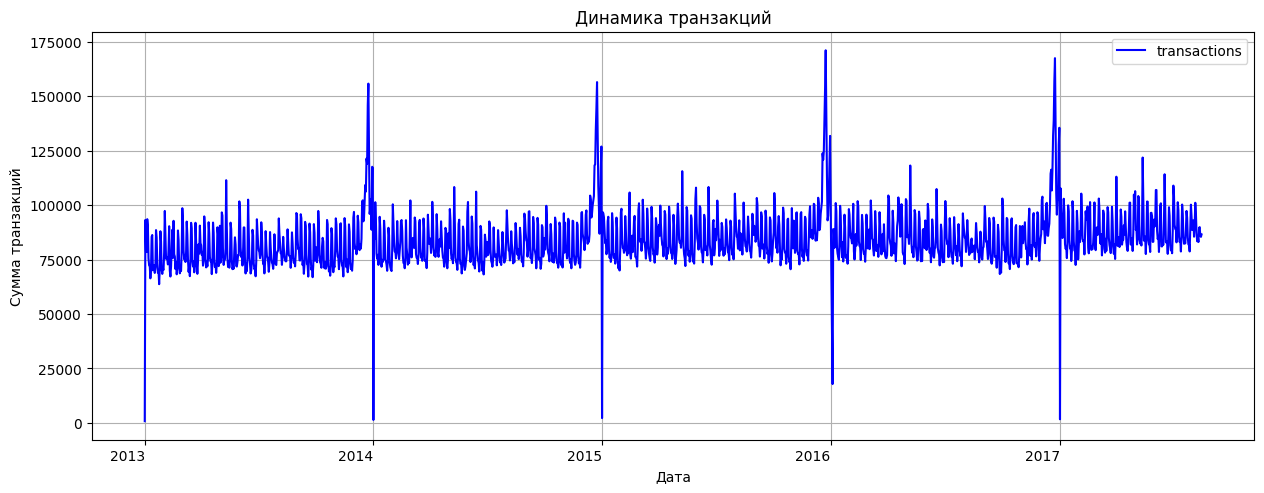

In [22]:
transactions.groupby('date').sum().plot(y='transactions', kind='line', figsize=(15, 6), title='Динамика транзакций', 
              xlabel='Дата', ylabel='Сумма транзакций', grid=True, color='blue')

# Форматирование оси X для отображения дат
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=0)  # Установка меток оси X горизонтальными
plt.show()

На основе предоставленных данных о транзакциях можно провести следующий анализ для выявления аномалий и выбросов:

##### Анализ числовых данных (`transactions`)

1. **Статистическое резюме**:

   | Параметр         | Значение                 |
   |------------------|--------------------------|
   | **Количество**   | 83,488                   |
   | **Среднее значение** | 1,694.60               |
   | **Минимум**      | 5                        |
   | **Медиана** | 1,393         |
   | **Максимум**     | 8,359                    |
   | **Стандартное отклонение** | 963.29            |

   Данные показывают, что количество транзакций варьируется от 5 до 8,359. Среднее значение и медиана указывают на то, что большинство значений сосредоточены в диапазоне от 1,046 до 2,079, но также имеются и экстремальные значения.

   - **Выбросы**: Выявлены данные с количеством транзакций выше 99-го перцентиля:

     | date       | store_nbr | transactions |
     |------------|-----------|--------------|
     | 2013-01-02 | 46        | 4,886        |
     | 2013-01-05 | 44        | 4,921        |
     | 2013-01-05 | 46        | 4,935        |
     | 2013-01-06 | 44        | 4,925        |
     | 2013-01-06 | 46        | 5,401        |
     | ...        | ...       | ...          |

     Эти данные указывают на наличие аномально высоких значений транзакций, которые могут быть результатом сезонных пиков или других особых событий.

2. **График суммарных транзакций за день**:
   Из графика видно, что выявленные отклонения связаны с определенными датами, что может указывать на сезонные колебания или события, оказывающие значительное влияние на количество транзакций, данные не являются аномалиями


Таким образом, данные не содержат выбросы и аномалий

#### Проверка датасетов `test` и `sample_submission`
в проверке датасетов `test` и `sample_submission` нет необходимости, так как они предзначены для теста модели в будущем и демонстрации формата выходных данных 

## Создание датасета
После обработки данных, для удобства анализа необходимо создать единый датасет

Для объединения данных был выбран следующий подход:

1. **Объединение `train` и `transactions` по `store_nbr` и `date`**: Соединяем данные о продажах с данными о транзакциях, так как они связаны конкретными магазинами и датами. Это позволяет получить полную картину продаж и активности по магазинам на каждую дату.

2. **Объединение с `holidays_events` по `date`**: Добавляем информацию о праздничных событиях по дате. Это важно для учета влияния праздников на продажи, так как праздники могут значительно изменить спрос.

3. **Объединение с `oil` по `date`**: Включаем данные о ценах на нефть по дате, чтобы учесть макроэкономические факторы, которые могут влиять на покупательскую способность и стоимость логистики.

4. **Объединение с `stores` по `store_nbr`**: Добавляем информацию о магазинах, чтобы учитывать различные характеристики магазинов (например, тип и кластер). Это поможет учитывать особенности каждого магазина при анализе продаж.

In [23]:
# Объединение train и transactions по ['store_nbr', 'date']
train_transactions = pd.merge(train, transactions, on=['store_nbr', 'date'])

# Объединение с holidays_events по 'date'
train_transactions_holidays = pd.merge(train_transactions, holidays_events, on='date', how='left')

# Объединение с oil по 'date'
full_data_train = pd.merge(train_transactions_holidays, oil, on='date', how='left')

# Объединение с stores по 'store_nbr'
full_data_train = pd.merge(full_data_train, stores, on='store_nbr', how='left')

# Переименование колонок для ясности
full_data_train.rename(columns={
    'type_x': 'holiday_type',  # Из holidays_events
    'locale': 'holiday_locale',
    'locale_name': 'holiday_locale_name',
    'transferred': 'holiday_transferred',
    'type_y': 'store_type',    # Из stores
    'cluster': 'store_cluster'
}, inplace=True)

full_data_train

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,holiday_locale,holiday_locale_name,holiday_transferred,dcoilwtico,city,state,store_type,store_cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.000,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.000,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.000,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.000,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.000,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805226,3000883,2017-08-15,9,POULTRY,438.133,0,2155,Holiday,Local,Riobamba,False,47.57,Quito,Pichincha,B,6
2805227,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2155,Holiday,Local,Riobamba,False,47.57,Quito,Pichincha,B,6
2805228,3000885,2017-08-15,9,PRODUCE,2419.729,148,2155,Holiday,Local,Riobamba,False,47.57,Quito,Pichincha,B,6
2805229,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2155,Holiday,Local,Riobamba,False,47.57,Quito,Pichincha,B,6


После объединения данные необходимо проверить на пустые значения

In [24]:
full_data_train.isna().sum()

id                           0
date                         0
store_nbr                    0
family                       0
sales                        0
onpromotion                  0
transactions                 0
holiday_type           2346168
holiday_locale         2346168
holiday_locale_name    2346168
holiday_transferred    2346168
dcoilwtico              871926
city                         0
state                        0
store_type                   0
store_cluster                0
dtype: int64

Появились пустые значения в атрибутах:
- `Праздников и мероприятий`, связано это с тем что мероприятия проводятся не каждый день, пропуски в данно случае обозначают что мероприятий в этот день не было, поэтому заполним пропуски значением **NoEvent**
  
- `Цен на нефть`, похоже что нет данных цен на нефть за некоторые даты, заполним пропуски предыдущим значением по дате, это позволяит сохранить тренды и структуры данных, что отражает более реалистичное изменение цен. Это помогает избежать искажения данных, которое может возникнуть при использовании нулей или среднего значения.

In [25]:
full_data_train[['holiday_type','holiday_locale','holiday_locale_name','holiday_transferred']] = full_data_train[
    ['holiday_type','holiday_locale','holiday_locale_name','holiday_transferred']].fillna('NoEvent')
full_data_train['dcoilwtico'] = full_data_train['dcoilwtico'].bfill()

In [26]:
full_data_train.isna().sum()

id                     0
date                   0
store_nbr              0
family                 0
sales                  0
onpromotion            0
transactions           0
holiday_type           0
holiday_locale         0
holiday_locale_name    0
holiday_transferred    0
dcoilwtico             0
city                   0
state                  0
store_type             0
store_cluster          0
dtype: int64

Пустых значений больше нет

Для последующего удобства создадим такой же датасет для тестовых даннъх

In [27]:
test['date'] = pd.to_datetime(test['date'])

# Объединение с holidays_events по 'date'
test_transactions_holidays = pd.merge(test, holidays_events, on='date', how='left')

# Объединение с oil по 'date'
full_data_test = pd.merge(test_transactions_holidays, oil, on='date', how='left')

# Объединение с stores по 'store_nbr'
full_data_test = pd.merge(full_data_test, stores, on='store_nbr', how='left')

# Переименование колонок для ясности
full_data_test.rename(columns={
    'type_x': 'holiday_type',  # Из holidays_events
    'locale': 'holiday_locale',
    'locale_name': 'holiday_locale_name',
    'transferred': 'holiday_transferred',
    'type_y': 'store_type',    # Из stores
    'cluster': 'store_cluster'
}, inplace=True)

# Такое же заполнение пропусков
full_data_test[['holiday_type','holiday_locale','holiday_locale_name','holiday_transferred']] = full_data_test[
    ['holiday_type','holiday_locale','holiday_locale_name','holiday_transferred']].fillna('NoEvent')
full_data_test['dcoilwtico'] = full_data_test['dcoilwtico'].bfill()

# Вывод результата
full_data_test

,id,date,store_nbr,family,onpromotion,holiday_type,holiday_locale,holiday_locale_name,holiday_transferred,dcoilwtico,city,state,store_type,store_cluster
0,3000888,2017-08-16,1,AUTOMOTIVE,0,NoEvent,NoEvent,NoEvent,NoEvent,46.80,Quito,Pichincha,D,13
1,3000889,2017-08-16,1,BABY CARE,0,NoEvent,NoEvent,NoEvent,NoEvent,46.80,Quito,Pichincha,D,13
2,3000890,2017-08-16,1,BEAUTY,2,NoEvent,NoEvent,NoEvent,NoEvent,46.80,Quito,Pichincha,D,13
3,3000891,2017-08-16,1,BEVERAGES,20,NoEvent,NoEvent,NoEvent,NoEvent,46.80,Quito,Pichincha,D,13
4,3000892,2017-08-16,1,BOOKS,0,NoEvent,NoEvent,NoEvent,NoEvent,46.80,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,NoEvent,NoEvent,NoEvent,NoEvent,47.26,Quito,Pichincha,B,6
28508,3029396,2017-08-31,9,PREPARED FOODS,0,NoEvent,NoEvent,NoEvent,NoEvent,47.26,Quito,Pichincha,B,6
28509,3029397,2017-08-31,9,PRODUCE,1,NoEvent,NoEvent,NoEvent,NoEvent,47.26,Quito,Pichincha,B,6
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,NoEvent,NoEvent,NoEvent,NoEvent,47.26,Quito,Pichincha,B,6


## Выгрузка данных
Данные были поверены и обработаны, экспортируем их для дальнуйшего анализа

In [28]:
holidays_events.to_csv('precessing_data/holidays_events.csv')
oil.to_csv('precessing_data/oil.csv')
stores.to_csv('precessing_data/stores.csv')
sample_submission.to_csv('precessing_data/sample_submission.csv')
train.to_csv('precessing_data/full_data.csv')
full_data_train.to_csv('precessing_data/full_data_train.csv')
test.to_csv('precessing_data/test.csv')
full_data_test.to_csv('precessing_data/full_data_test.csv')
transactions.to_csv('precessing_data/transactions.csv')